    MACHINE EXERCISE NO. 4 Dimensionality Reduction
        Joshua Dela Cruz
        2023-02911

    PROBLEM: 8x8 handwritten digits data
    

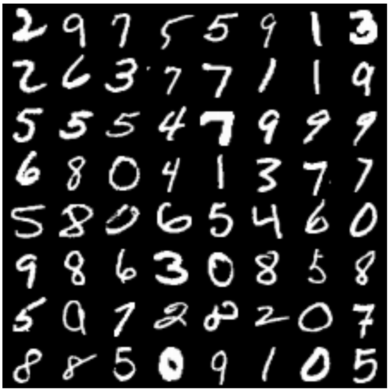

    Image reference:
    Information Theoretical Measures for Achieving Robust Learning Machines - Scientific Figure on ResearchGate. Available from: https://www.researchgate.net/figure/A-collage-of-8-8-randomly-picked-images-of-handwritten-digits-from-the-MNIST-training_fig2_306088728 [accessed 13 Apr, 2024]

    Main Objective:
    Perform classification on the 8x8 Handwritten Digits Dataset using (1) PCA with 2 Components + SVM and (2) LDA with 2 Components then use various aspects such as computational effort, human effort, model accuracy, interpretability to compare the two methods. 

# General Resources

### Libraries

In [1]:
# Data importation, manipulation and basic libraries
import os 
import pandas as pd
import numpy as np

In [2]:
# Model creation and hyperparameter tuning
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [3]:
# Dimensionality Reduction
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [4]:
# Data visualization and result analysis
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [5]:
# Data Preparation
from sklearn.model_selection import train_test_split

In [6]:
# Auxilliaries
from time import time

In [7]:
color_palette = 'Greys'
colors = sns.color_palette('tab10')

In [8]:
import warnings

# Suppress 'deprecated' warnings, added in final run to clean notebook when printing into pdf
warnings.filterwarnings("ignore")

### Dataset

#### Import

In [9]:
from sklearn.datasets import load_digits
raw_data_x, raw_data_y = load_digits(return_X_y=True)

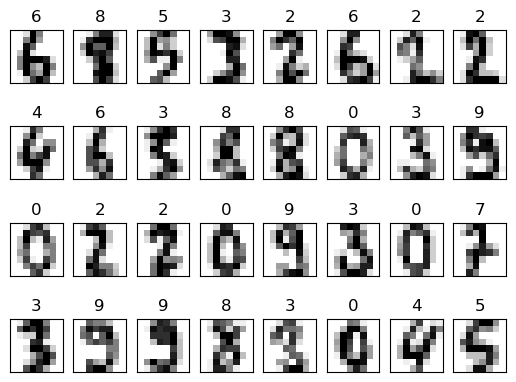

In [10]:
rows, cols = 4, 8
fig, ax = plt.subplots(rows, cols, sharex='col', sharey='row',
                       subplot_kw=dict(xticks=[], yticks=[]))

for row in range(rows):
    for col in range(cols):
        n = np.random.randint(1796)+1    # show random samples
        im = ax[row, col].imshow(raw_data_x[n].reshape((8,8)), cmap=plt.cm.binary)
        ax[row, col].set_title(raw_data_y[n])
        im.set_clim(0, 16)

plt.show()

In [11]:
handwritten_digits_df = pd.DataFrame(raw_data_x, columns=[f"pixel_{i}" for i in range(raw_data_x.shape[1])])
handwritten_digits_df["target"] = raw_data_y

In [12]:
handwritten_digits_df

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_55,pixel_56,pixel_57,pixel_58,pixel_59,pixel_60,pixel_61,pixel_62,pixel_63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


#### Exploratory Analysis

In [13]:
handwritten_digits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pixel_0   1797 non-null   float64
 1   pixel_1   1797 non-null   float64
 2   pixel_2   1797 non-null   float64
 3   pixel_3   1797 non-null   float64
 4   pixel_4   1797 non-null   float64
 5   pixel_5   1797 non-null   float64
 6   pixel_6   1797 non-null   float64
 7   pixel_7   1797 non-null   float64
 8   pixel_8   1797 non-null   float64
 9   pixel_9   1797 non-null   float64
 10  pixel_10  1797 non-null   float64
 11  pixel_11  1797 non-null   float64
 12  pixel_12  1797 non-null   float64
 13  pixel_13  1797 non-null   float64
 14  pixel_14  1797 non-null   float64
 15  pixel_15  1797 non-null   float64
 16  pixel_16  1797 non-null   float64
 17  pixel_17  1797 non-null   float64
 18  pixel_18  1797 non-null   float64
 19  pixel_19  1797 non-null   float64
 20  pixel_20  1797 non-null   floa

In [14]:
# Obtain features and target data
features_df = handwritten_digits_df.drop(columns=['target'])
target_df = handwritten_digits_df['target']

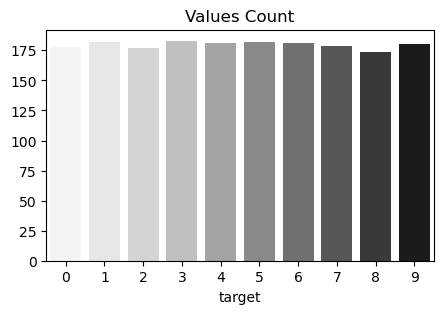

In [15]:
target_count_df = handwritten_digits_df['target'].value_counts()
plt.figure(figsize=(5, 3))
sns.barplot(x=target_count_df.index, y=target_count_df.values, palette=color_palette)
plt.title("Values Count")
plt.show()

In [16]:
unique_class, counts = np.unique(raw_data_y, return_counts=True)

# Create a dictionary to store the counts
count_dict = dict(zip(unique_class, counts))

# Print the counts
for class_number, count in count_dict.items():
    print(f"Class {class_number} count = {count}")

Class 0 count = 178
Class 1 count = 182
Class 2 count = 177
Class 3 count = 183
Class 4 count = 181
Class 5 count = 182
Class 6 count = 181
Class 7 count = 179
Class 8 count = 174
Class 9 count = 180


    1. No null data
    2. Classes are relatively balanced with minority having 174 data and majority at around 183

## (a) Visualization

In [17]:
def perform_PCA(x, y, target, df):
    
    # Perform PCA to view the CPV plot
    pca = PCA(n_components=target).fit(x)
    var = pca.explained_variance_ratio_
    cpv = np.cumsum(var)*100
    plt.plot(np.arange(cpv.size)+1,cpv,'bo-')
    plt.title('Cumulative % Variance')
    plt.xlabel('No. of Principal Components')
    plt.ylabel('CPV (%)')
#     plt.grid()
    plt.show()
    
    # Get the transformed features
    pca.fit(x)
    pca_x = pca.transform(x)

    # Get the explained variance ratio and cumulative sum
    print(f"Cumulative % Variance:\n", cpv)
    
    # Find the number of components that explain the target variance
    # Used when declaring the target variance and not the number of components
#     n_components = len(cpv)

#     # Retain the top components that make up the target variance
#     pca_x = pca_x[:, :n_components]
    
    value = 'complete' if target == None else target
    
    print(f"Shape of image before PCA: {x.shape}") 
    print(f"Shape of image after PCA: {pca_x.shape}") 
    print(f"CPV at {value} PCs: {round(100*np.sum(pca.explained_variance_ratio_), 4)}%")
        
    return pca_x, y

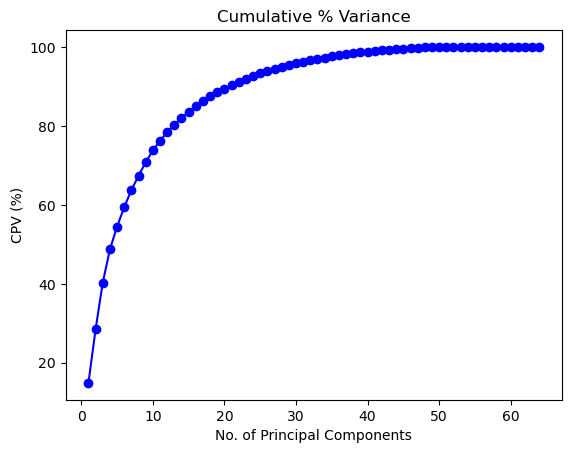

Cumulative % Variance:
 [ 14.89059358  28.50936482  40.30395859  48.71393801  54.49635267
  59.41326299  63.72925     67.39062258  70.74387068  73.82267688
  76.19501773  78.4677143   80.28957761  82.06343255  83.53053364
  84.94024924  86.25883844  87.50697626  88.52469422  89.43031166
  90.31985012  91.11697328  91.88446653  92.6073701   93.30325895
  93.89934041  94.4749551   94.99011268  95.47965246  95.90854042
  96.28214647  96.6354207   96.97210468  97.30013453  97.60845542
  97.90223405  98.15882265  98.38656505  98.60884297  98.82027337
  99.01018243  99.16883533  99.31999527  99.46057403  99.57719632
  99.68468884  99.78109415  99.85855718  99.91427833  99.9547114
  99.97570304  99.98395101  99.98920251  99.99425494  99.99755456
  99.99879821  99.99950304  99.99980447  99.9999107   99.99996571
 100.         100.         100.         100.        ]
Shape of image before PCA: (1797, 64)
Shape of image after PCA: (1797, 64)
CPV at complete PCs: 100.0%


In [18]:
complete_x, complete_y = perform_PCA(raw_data_x, raw_data_y, None, handwritten_digits_df)

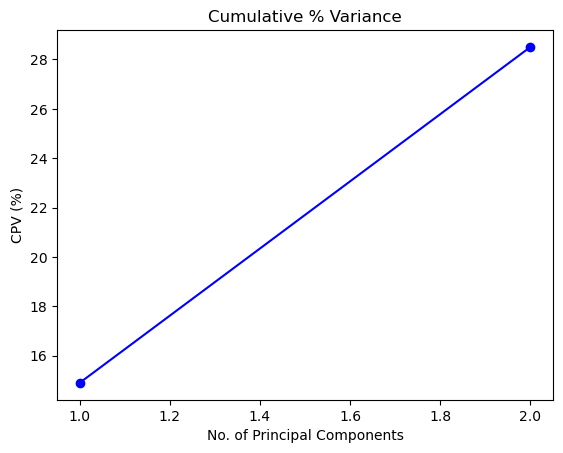

Cumulative % Variance:
 [14.89059358 28.50936482]
Shape of image before PCA: (1797, 64)
Shape of image after PCA: (1797, 2)
CPV at 2 PCs: 28.5094%


In [19]:
pca_x, pca_y = perform_PCA(raw_data_x, raw_data_y, 2, handwritten_digits_df)

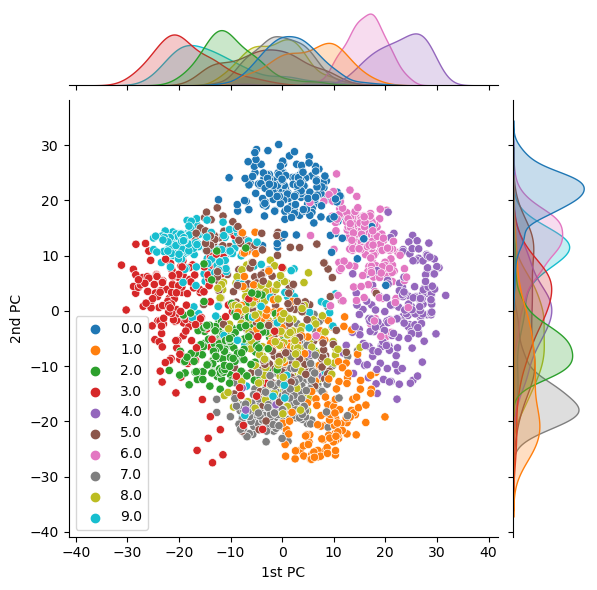

In [21]:
pca_df = pd.DataFrame(data=np.c_[pca_x, pca_y],
                  columns=['1st PC','2nd PC','target'])
sns.jointplot(data=pca_df, x="1st PC", y="2nd PC", hue="target", palette=colors)
plt.legend()
plt.show()

## (b) SVM Classification

### Data Preparation

#### Label Setup

In [22]:
label_list = list(set(handwritten_digits_df['target'].tolist()))
label_list

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

#### Data Partitioning

    Split samples into 70% training and 30% test data

In [23]:
print(pca_x.shape)
print(pca_y.shape)

(1797, 2)
(1797,)


In [24]:
x_train, x_test, y_train, y_test = train_test_split(pca_x, pca_y, test_size=0.3, random_state=0, stratify=pca_y)

### Default Model

#### Fit Training

In [25]:
default_model = SVC().fit(x_train, y_train)

#### Testing

In [26]:
def create_confusion_matrix_and_report(model, x, y, labels):
    labels = [str(label) for label in labels]
    
    y_prediction = model.predict(x)
    conf_matrix = confusion_matrix(y, y_prediction)

    conf_matrix_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = labels)
    conf_matrix_display.plot(cmap=color_palette)

    plt.title('Confusion Matrix')
    plt.show()

    report = classification_report(y, y_prediction, target_names=labels)
    print(report)
    
    # Split the classification report by lines
    report_lines = report.strip().split('\n')

    # Corresponding line to 'weighted avg'
    weighted_avg_line = report_lines[-1]

    # Split the 'weighted avg' line by spaces
    weighted_avg_values = weighted_avg_line.split()

    # Extract the first column  from the 'weighted avg' line
    weighted_avg_accuracy = float(weighted_avg_values[2])
    
    return weighted_avg_accuracy

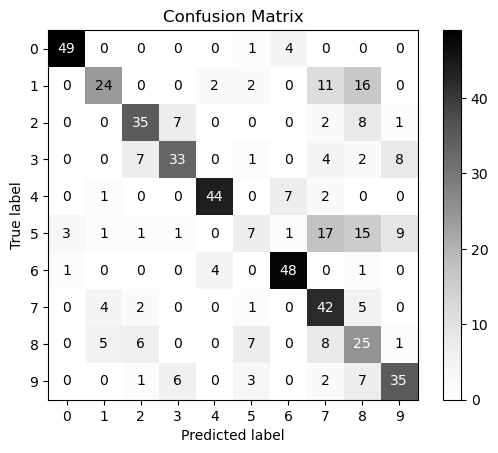

              precision    recall  f1-score   support

           0       0.92      0.91      0.92        54
           1       0.69      0.44      0.53        55
           2       0.67      0.66      0.67        53
           3       0.70      0.60      0.65        55
           4       0.88      0.81      0.85        54
           5       0.32      0.13      0.18        55
           6       0.80      0.89      0.84        54
           7       0.48      0.78      0.59        54
           8       0.32      0.48      0.38        52
           9       0.65      0.65      0.65        54

    accuracy                           0.63       540
   macro avg       0.64      0.63      0.63       540
weighted avg       0.64      0.63      0.63       540



In [27]:
test_accuracy = create_confusion_matrix_and_report(default_model, x_test, y_test, label_list)

### Model Optimization

#### Grid Search

In [28]:
def grid_search_SVC(x, y):
    
    # Create a pipeline with a StandardScaler and SVC with balanced class weights
    default_model = make_pipeline(StandardScaler(), SVC())

    # Specify the grid: parameters and values
    param_grid = {'svc__C': [0.1, 1, 10, 100],
                  'svc__degree': [1, 2, 3],
                  'svc__gamma': [1, 0.1, 0.01, 0.001, 'auto'],
                  'svc__kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

    # Perform grid search
    grid_search = GridSearchCV(default_model, param_grid, refit=True, verbose=0, n_jobs=-1)
    start = time()
    grid_search.fit(x, y)
    print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
          % (time() - start, len(grid_search.cv_results_["params"])))

    # Print best parameters after tuning
    print(grid_search.best_params_)

    # Print how our model looks after hyper-parameter tuning
    print(grid_search.best_estimator_)

    return grid_search.best_estimator_, grid_search.best_params_

In [29]:
grid_search_best_model, best_params = grid_search_SVC(x_train, y_train)

GridSearchCV took 13.16 seconds for 240 candidate parameter settings.
{'svc__C': 10, 'svc__degree': 1, 'svc__gamma': 'auto', 'svc__kernel': 'rbf'}
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=10, degree=1, gamma='auto'))])


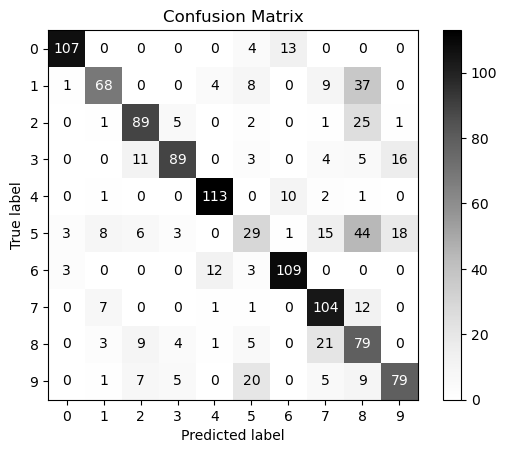

              precision    recall  f1-score   support

           0       0.94      0.86      0.90       124
           1       0.76      0.54      0.63       127
           2       0.73      0.72      0.72       124
           3       0.84      0.70      0.76       128
           4       0.86      0.89      0.88       127
           5       0.39      0.23      0.29       127
           6       0.82      0.86      0.84       127
           7       0.65      0.83      0.73       125
           8       0.37      0.65      0.47       122
           9       0.69      0.63      0.66       126

    accuracy                           0.69      1257
   macro avg       0.71      0.69      0.69      1257
weighted avg       0.71      0.69      0.69      1257



In [30]:
best_train_accuracy = create_confusion_matrix_and_report(grid_search_best_model, x_train, y_train, label_list)

### Testing

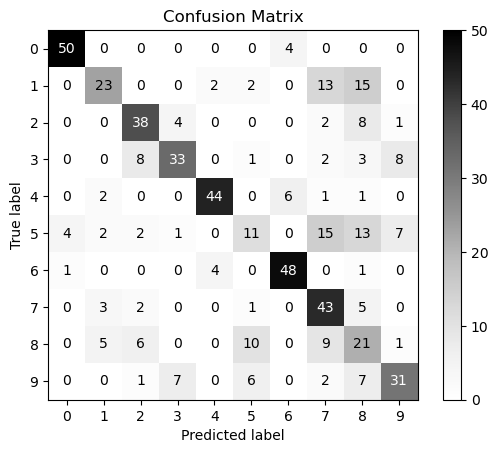

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        54
           1       0.66      0.42      0.51        55
           2       0.67      0.72      0.69        53
           3       0.73      0.60      0.66        55
           4       0.88      0.81      0.85        54
           5       0.35      0.20      0.26        55
           6       0.83      0.89      0.86        54
           7       0.49      0.80      0.61        54
           8       0.28      0.40      0.33        52
           9       0.65      0.57      0.61        54

    accuracy                           0.63       540
   macro avg       0.65      0.63      0.63       540
weighted avg       0.65      0.63      0.63       540



In [31]:
best_test_accuracy = create_confusion_matrix_and_report(grid_search_best_model, x_test, y_test, label_list)

## (c) LDA Classification

### Data Preparation

#### Data Partitioning

In [32]:
print(raw_data_x.shape)
print(raw_data_y.shape)

(1797, 64)
(1797,)


In [33]:
c_x_train, c_x_test, c_y_train, c_y_test = train_test_split(raw_data_x, raw_data_y, test_size=0.3, random_state=0, stratify=raw_data_y)

### Fit Training

In [34]:
lda = LinearDiscriminantAnalysis(n_components=2)
train_lda = lda.fit_transform(c_x_train, c_y_train)
test_lda = lda.transform(c_x_test)

In [35]:
test_lda

array([[-0.37188795,  5.26449711],
       [ 7.29642008,  2.21706173],
       [-3.14809531, -1.41704895],
       ...,
       [ 3.38536717,  0.59974002],
       [ 0.98281577,  2.01143403],
       [-3.92739589, -0.81703388]])

### Testing

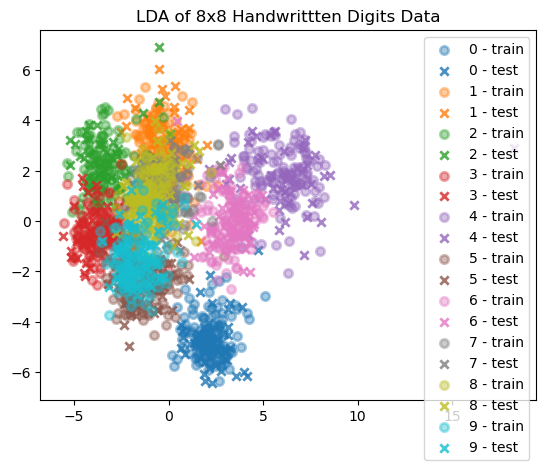

In [36]:
# LDA Results
for color, i, target_name in zip(colors, label_list, label_list):
    plt.scatter(train_lda[c_y_train == i, 0], train_lda[c_y_train == i, 1], 
                color=color, alpha=0.4, lw=2, label=f'{target_name} - train')
    plt.scatter(test_lda[c_y_test == i, 0], test_lda[c_y_test == i, 1], 
                color=color, alpha=0.8, lw=2, label=f'{target_name} - test', marker='x')
    
plt.legend(loc="best", shadow=False)
plt.title("LDA of 8x8 Handwrittten Digits Data")
plt.show()

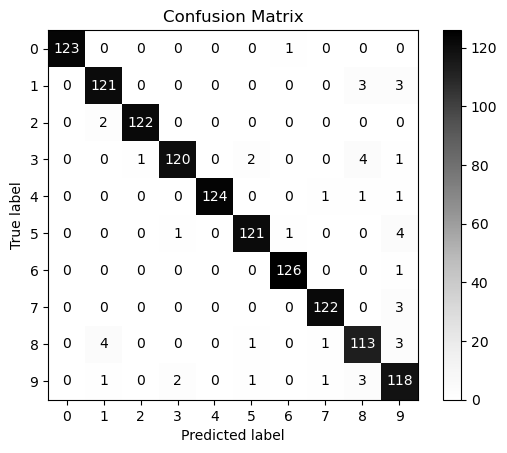

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       124
           1       0.95      0.95      0.95       127
           2       0.99      0.98      0.99       124
           3       0.98      0.94      0.96       128
           4       1.00      0.98      0.99       127
           5       0.97      0.95      0.96       127
           6       0.98      0.99      0.99       127
           7       0.98      0.98      0.98       125
           8       0.91      0.93      0.92       122
           9       0.88      0.94      0.91       126

    accuracy                           0.96      1257
   macro avg       0.96      0.96      0.96      1257
weighted avg       0.96      0.96      0.96      1257



In [37]:
lda_train_accuracy = create_confusion_matrix_and_report(lda, c_x_train, c_y_train, label_list)

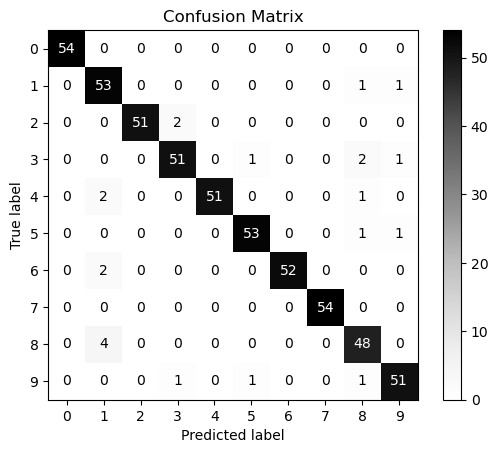

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       0.87      0.96      0.91        55
           2       1.00      0.96      0.98        53
           3       0.94      0.93      0.94        55
           4       1.00      0.94      0.97        54
           5       0.96      0.96      0.96        55
           6       1.00      0.96      0.98        54
           7       1.00      1.00      1.00        54
           8       0.89      0.92      0.91        52
           9       0.94      0.94      0.94        54

    accuracy                           0.96       540
   macro avg       0.96      0.96      0.96       540
weighted avg       0.96      0.96      0.96       540



In [38]:
lda_test_accuracy = create_confusion_matrix_and_report(lda, c_x_test, c_y_test, label_list)

# Insights

    In a quick comparison using the obtained accuracy metric, LDA clearly outperforms PCA with SVM. LDA achieved a test accuracy of 96%, whereas PCA with SVM only reached around 65%. Moreover, LDA achieved this superior accuracy with minimal human effort, as it did not require experimenting with various hyperparameters, unlike SVM, which needed tuning and exploration of various search methods and multi-classification strategies.

    In terms of computational effort, LDA is simpler because it is a supervised and analytical calculation, it just needed the target labels and calculate the eigenvalue of the datapoint. In contrast, SVM is an optimization problem though this makes it more flexible as it allows the user to optimize over either the number of data points or the number of variables. Additionally, SVM can make use of kernels to transform the SVM classification from a linear classifier into a non-linear classifier.

    Furthermore, LDA is more direct and easier to interpret. It essentially just transforms the data into the maximum linearly separable projection. On the other hand, SVM has many parameters, making it less intuitive to explain as there is a lot of factor to consider when interpreting even its decision boundary on a scatter plot.